In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Train the model** 

Image loading..................
Found 13892 images belonging to 2 classes.
Found 3504 images belonging to 2 classes.
Image loading done.......................
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                             

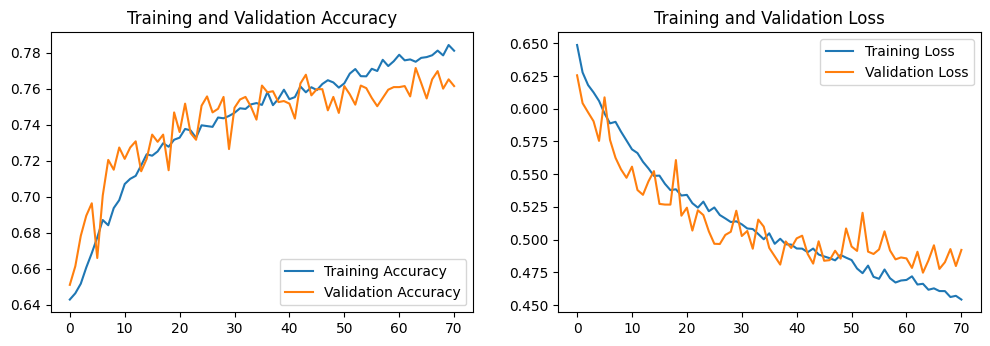

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import EarlyStopping

IMG_HEIGHT = 48
IMG_WIDTH = 48
batch_size = 32


train_data_dir= '/content/drive/MyDrive/testtranquilizer/data/train/' 
validation_data_dir= '/content/drive/MyDrive/testtranquilizer/data/test/'

print("Image loading..................")


train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					horizontal_flip=True,
					fill_mode='nearest')

#data augmentation
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(IMG_HEIGHT, IMG_WIDTH),
					batch_size= batch_size,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(IMG_HEIGHT, IMG_WIDTH),
							batch_size= batch_size,
							class_mode='categorical',
							shuffle=True)

print("Image loading done.......................")

class_labels=['Anxiety', 'Neutral']

img, label = train_generator.__next__()

#create the model
model = Sequential()

#add layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))

#compile model
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())


train_path = "/content/drive/MyDrive/testtranquilizer/data/train"
test_path = "/content/drive/MyDrive/testtranquilizer/data/test"

num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)
    
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)
    
print('Total number of train images:', num_train_imgs)
print('Total number of test images:', num_test_imgs)

#early stops when model accuracy doesn't increase
early_stopping = EarlyStopping(monitor = 'val_loss',
							min_delta = 0,
							patience = 3,
							verbose = 1,
							restore_best_weights= True)

callbacks_list = [early_stopping]
epochs=71

#train model
history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//32,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//32)


print('Final training accuracy:', history.history['accuracy'][-1])
print('Final validation accuracy:', history.history['val_accuracy'][-1])


model.save('/content/drive/MyDrive/testtranquilizer/model_file_71epochs.h5')


# plot training and validation accuracy graph

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()